In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# Defining Parameters
Q_0 = 500/60*10**(-6)*10**(-3) #m3/s, 500ul/min
R_0 = 5e10 #Pa.s/m3
R_1 = 4e11 #Pa.s/m3
P_th_open_rel = 10.83*10**3 #Pa
P_th_close_rel = 4.26*10**3 #Pa
v_0 = 2.5e-11 #m3
C_valve = 1.173e-15
AL = 6e-5 #m3
P_atm = 101325 #Pa
Q_M = 3.84e-3 #mL/min
Q_M = Q_M/60*1e-6 #m3/s
P_th_open_abs = P_th_open_rel + P_atm
P_th_close_abs = P_th_close_rel + P_atm
loc = '/Users/vishwavasani/GaTech Dropbox/Vishwa Vasani/Vishwa@GATech/Air Oscillator'

In [3]:
def charge_noLeak(z, t):
    x, y = z
    T1 = (x*Q_0)/(AL-Q_0*t) - (x*x - y*y)/(2*R_0*(AL-Q_0*t))
    T2 = (x*x-y*y)/(2*R_0*(v_0 + C_valve*(2*y - P_th_close_abs)))
    return [T1, T2]

In [4]:
def charge_Leak(z, t):
    x, y = z
    T1 = (x*Q_0)/(AL-Q_0*t) - (x*x - y*y)/(2*R_0*(AL-Q_0*t))
    T2 = ((x*x-y*y)/(2*R_0) - Q_M*y)*1/(v_0 + C_valve*(2*y - P_th_close_abs))
    return [T1, T2]

In [5]:
def discharge(z, t):
    x, y = z
    T1 = (x*Q_0)/(AL-Q_0*t) - (x*x - y*y)/(2*R_0*(AL-Q_0*t))
    T2 = ((x*x - y*y)/(2*R_0) - (y*y - P_atm**2)/(2*R_1))*(1/(v_0 + C_valve*(2*y-P_th_open_abs)))
    return [T1, T2]

In [6]:
#noLeak
time_period_charge = []
time_period_discharge = []
time_period_total = []
p_trace = []
t_trace = []
t_total_start = 0
C_system = []
z0 = [P_th_close_abs+10, P_th_close_abs]

for i in range(0,13):    
    t = np.linspace(t_total_start + 0, t_total_start + 1000, 1000001)
    sol = odeint(charge_noLeak, z0, t)

    index = np.min(np.where(sol[:,1]>P_th_open_abs))
    time_period_charge.append(t[index]-t_total_start)
    t_total_mid = t[index]
    z0 = [sol[index, 0], sol[index, 1]]

    #z0 = [P_th_open_abs, P_th_open_abs]
    t = np.linspace(t_total_mid + 0, t_total_mid + 1000, 1000001)
    sol1 = odeint(discharge, z0, t)

    index1 = np.min(np.where(sol1[:,1] < 101325 + 4.27*10**3))
    time_period_discharge.append(t[index1]-t_total_mid)
    t_total_end = t[index1]
    z0 = [sol1[index, 0], sol1[index, 1]]

    sol2 = np.concatenate((sol[:index, 1] - 101325, sol1[:index1, 1] - 101325))
    t_combined = np.linspace(t_total_start,t_total_end, np.size(sol2))
    
    p_trace = np.concatenate([p_trace, sol2])
    t_trace = np.concatenate([t_trace, t_combined])
    
    P_rateOfChange = (P_th_open_abs-P_th_close_abs)/(time_period_charge[-1])
    C = Q_0/P_rateOfChange
    C_system.append(C)

    t_total_start = t_total_end

time_period_charge_noLeak = time_period_charge
time_period_discharge_noLeak = time_period_discharge
time_period_total_leak = time_period_total
p_trace_noLeak = p_trace
t_trace_noLeak = t_trace
C_system_noLeak = C_system

In [7]:
#Leak
time_period_charge = []
time_period_discharge = []
time_period_total = []
p_trace = []
t_trace = []
t_total_start = 0
C_system = []
z0 = [P_th_close_abs+10, P_th_close_abs]

for i in range(0,13):    
    t = np.linspace(t_total_start + 0, t_total_start + 1000, 1000001)
    sol = odeint(charge_Leak, z0, t)

    index = np.min(np.where(sol[:,1]>P_th_open_abs))
    time_period_charge.append(t[index]-t_total_start)
    t_total_mid = t[index]
    z0 = [sol[index, 0], sol[index, 1]]

    #z0 = [P_th_open_abs, P_th_open_abs]
    t = np.linspace(t_total_mid + 0, t_total_mid + 1000, 1000001)
    sol1 = odeint(discharge, z0, t)

    index1 = np.min(np.where(sol1[:,1] < 101325 + 4.27*10**3))
    time_period_discharge.append(t[index1]-t_total_mid)
    t_total_end = t[index1]
    z0 = [sol1[index, 0], sol1[index, 1]]

    sol2 = np.concatenate((sol[:index, 1] - 101325, sol1[:index1, 1] - 101325))
    t_combined = np.linspace(t_total_start,t_total_end, np.size(sol2))
    
    p_trace = np.concatenate([p_trace, sol2])
    t_trace = np.concatenate([t_trace, t_combined])
    
    P_rateOfChange = (P_th_open_abs-P_th_close_abs)/(time_period_charge[-1])
    C = Q_0/P_rateOfChange
    C_system.append(C)

    t_total_start = t_total_end

time_period_charge_Leak = time_period_charge
time_period_discharge_Leak = time_period_discharge
time_period_total_Leak = time_period_total
p_trace_Leak = p_trace
t_trace_Leak = t_trace
C_system_Leak = C_system

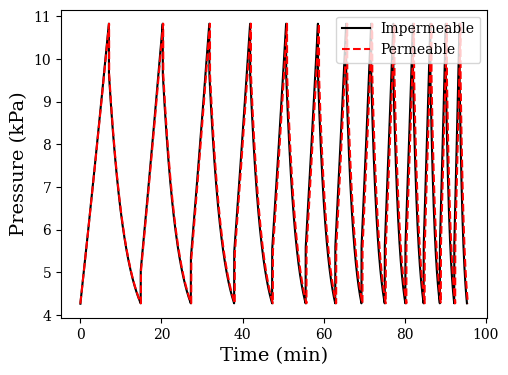

In [8]:
plt_1 = plt.figure(figsize=(5.5, 4))
plt.rc('font', family = 'serif')
plt.plot(t_trace_noLeak[:]/60,(p_trace_noLeak[:]/1000), 'k-', label = 'Impermeable')
plt.plot(t_trace_Leak[:]/60,(p_trace_Leak[:]/1000), 'r--', label = 'Permeable')
plt.xlabel('Time (min)', size = 14)
plt.ylabel('Pressure (kPa)', size = 14)
plt.legend(loc = 1)
plt.savefig(loc + 'pressure-time-multipleCycles-leak-v-noLeak.svg',dpi=400)

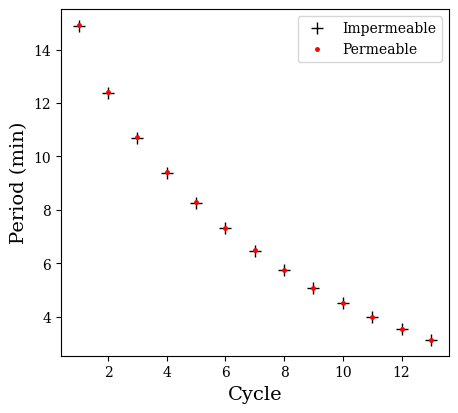

In [9]:
plt_1 = plt.figure(figsize=(5, 4.5))
plt.rc('font', family = 'serif')
fig = plt.plot(np.linspace(1,13,13), 
               (np.add(time_period_charge_noLeak, time_period_discharge_noLeak))/60, 
               'k+', ms = 8, mfc=None, mec=None, label = 'Impermeable')
fig = plt.plot(np.linspace(1,13,13), (np.add(time_period_charge_Leak, time_period_discharge_Leak))/60, 
               'r.', ms=5, label = 'Permeable' )
plt.xlabel('Cycle', size = 14)
plt.ylabel('Period (min)', size =14)
plt.legend(loc = 1)
plt.savefig(loc + 'period-cycle-leak-v-noLeak.svg',dpi=400)
plt.show()

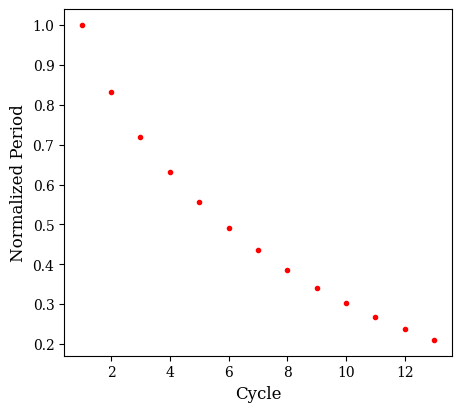

In [10]:
plt_1 = plt.figure(figsize=(5, 4.5))
fig = plt.plot(np.linspace(1,13,13), np.add(time_period_charge, time_period_discharge)/(time_period_charge[0] + time_period_discharge[0]), 'r.')
plt.xlabel('Cycle', size = 12)
plt.ylabel('Normalized Period', size = 12)
plt.savefig(loc + 'normalizedPeriod-cycle.svg',dpi=400)
plt.show()

Text(0, 0.5, 'System Capacitance')

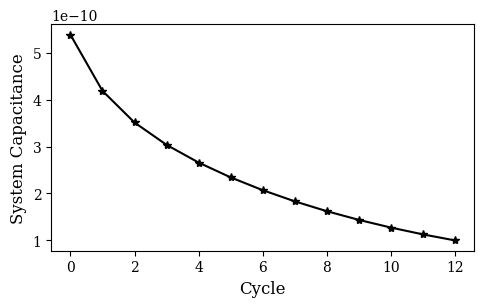

In [11]:
plt_1 = plt.figure(figsize=(3.64*1.5, 1.96*1.5))
plt.plot(C_system, 'k*-')
plt.xlabel('Cycle', size = 12)
plt.ylabel('System Capacitance', size = 12)